# Neural models of spoken language: Final assignment

Adapted from: Grzegorz Chrupała and Gaofei Shen https://colab.research.google.com/drive/10HZttIZU1wBtqG84e6OnIARMld-aqFW-?usp=sharing

Some of the materials are from [HuggingFace blog post](https://huggingface.co/blog/fine-tune-wav2vec2-english) \
Additional models are from https://github.com/jasonppy/syllable-discovery.

References:

Peng, P., & Harwath, D. (2022). Word Discovery in Visually Grounded, Self-Supervised Speech Models. Interspeech 2022, 2823–2827. https://doi.org/10.21437/Interspeech.2022-10652\
Peng, P., Li, S., Rasanen, O., Mohamed, A., & Harwath, D.F. (2023). Syllable Discovery and Cross-Lingual Generalization in a Visually Grounded, Self-Supervised Speech Model. In Interspeech. https://doi.org/10.21437/Interspeech.2023-2044

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
colab_nb_root_dir = os.path.join(os.getcwd(),'drive/MyDrive/Colab Notebooks/NLP/')

if not os.path.isdir(colab_nb_root_dir):
  os.mkdir(colab_nb_root_dir)

# If you are not using the university Google account, uncomment the following line
# colab_nb_root_dir = os.path.join(os.getcwd(),'NLP/')

if not os.path.isdir(colab_nb_root_dir):
  os.mkdir(colab_nb_root_dir)

os.environ['TRANSFORMERS_CACHE'] = '/content/drive/MyDrive/Colab Notebooks/NLP/HuggingfaceCache'
# os.environ['HF_DATASETS_CACHE'] = '/content/drive/MyDrive/Colab Notebooks/NLP/HuggingfaceCache/Datasets'

In [3]:
#@title Download the TIMIT dataset to your Google Drive
%%capture
!wget -nc -O "/content/drive/MyDrive/Colab Notebooks/NLP/timit.tar" 'https://filesender.surf.nl/download.php?token=a6706f9a-c57f-496a-bda4-d8d580ad7f7b&files_ids=19900522'
!cp "/content/drive/MyDrive/Colab Notebooks/NLP/timit.tar" .
!tar -xf timit.tar

In [4]:
#@title We need to download and load a few python libraries to make our code work
%%capture
%cd /content
!pip install -U datasets

from utils import saving_phoneme_representations, generating_classifier_input, classification, plotting_results, phoneme_to_ipa, visualize_phoneme_distribution, timit
from datasets import load_dataset
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'


## Phoneme classification from pre-trained wav2vec2 models step by step

### Distribution of phonemes in TIMIT test split.


In [5]:
# Get the length of the test split
test_data_length = len(timit['test'])

print("Length of the test data split:", test_data_length)

Length of the test data split: 1680


### Running the phoneme classification experiment on Spanish pre-trained speech language model:

config.json:   0%|          | 0.00/2.31k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()


/content/drive/MyDrive/Colab Notebooks/NLP/facebook-wav2vec2-base-es-voxpopuli-v2_timit-test_phoneme-representations.pt exists already! loading it instead of generating a new one


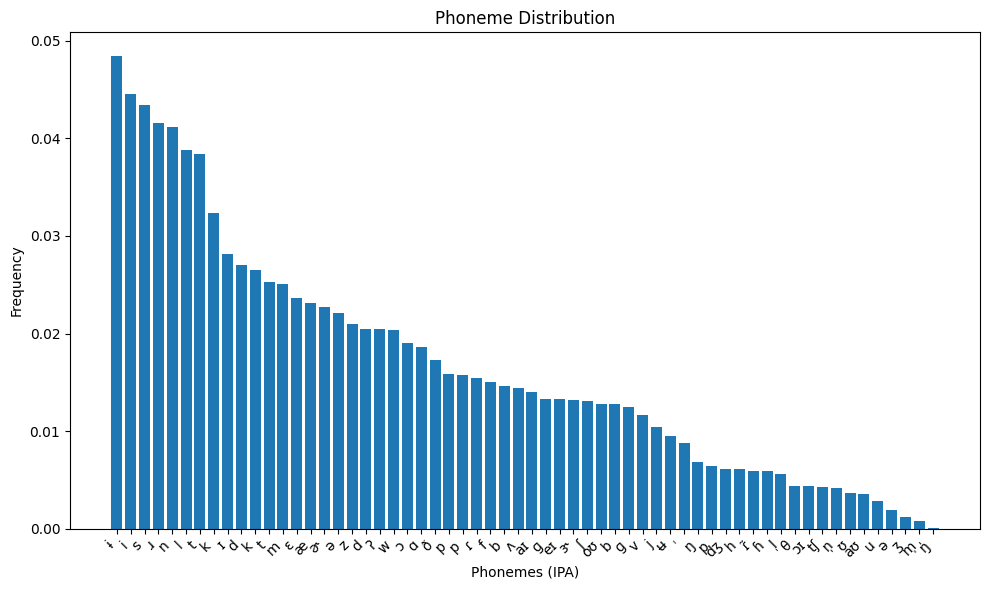

In [6]:
# Name of the model
model_name = "facebook/wav2vec2-base-es-voxpopuli-v2"

# Generate the phoneme representations
timit_test_phoneme_representations = saving_phoneme_representations(model_name = model_name,
                                                                    overwrite = False,
                                                                    split = 'test',
                                                                    save_dir = '/content/drive/MyDrive/Colab Notebooks/NLP/')

# Visualizing phoneme distribution in dataset
visualize_phoneme_distribution(timit_test_phoneme_representations, phoneme_to_ipa)



Layers:   0%|          | 0/13 [00:00<?, ?it/s]

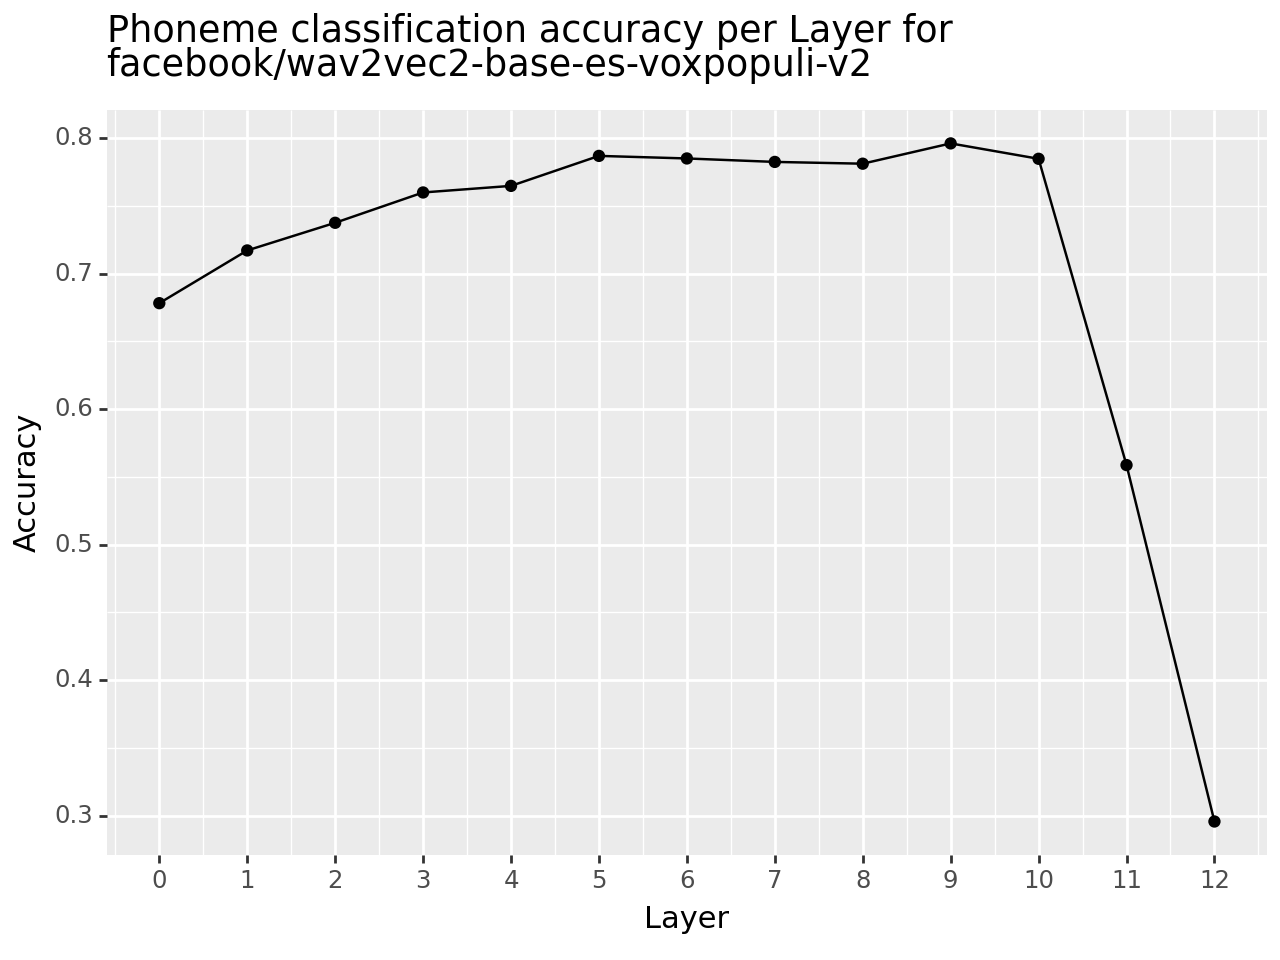

<Figure Size: (640 x 480)>

In [7]:
# Format the phoneme representations into classifier input
timit_test_classifier_input = generating_classifier_input(timit_test_phoneme_representations, overwrite = False)

# Run classification
results = classification(timit_test_classifier_input)

# Plot the results
plotting_results(results, model_name)


In [8]:
for item in results:
  print(item)

{'layer': 0, 'acc_score': 0.6781278275890433, 'f1_score': 0.6701009008396294}
{'layer': 1, 'acc_score': 0.7170354528255326, 'f1_score': 0.7108472197186373}
{'layer': 2, 'acc_score': 0.7374352225055524, 'f1_score': 0.7291237883210013}
{'layer': 3, 'acc_score': 0.7598091634449289, 'f1_score': 0.7541288909468403}
{'layer': 4, 'acc_score': 0.7646623344575142, 'f1_score': 0.7590798941511561}
{'layer': 5, 'acc_score': 0.7867895039894711, 'f1_score': 0.782169496500846}
{'layer': 6, 'acc_score': 0.7848975898659208, 'f1_score': 0.7817086055738359}
{'layer': 7, 'acc_score': 0.7823476186559184, 'f1_score': 0.7788378947410672}
{'layer': 8, 'acc_score': 0.781031504483014, 'f1_score': 0.7773947311223659}
{'layer': 9, 'acc_score': 0.7960023031998026, 'f1_score': 0.7932345608832029}
{'layer': 10, 'acc_score': 0.7846508184585013, 'f1_score': 0.7804011408764108}
{'layer': 11, 'acc_score': 0.55869046639796, 'f1_score': 0.5103644863022896}
{'layer': 12, 'acc_score': 0.2957144032244797, 'f1_score': 0.21213

### Running the phoneme classification experiment on Dutch pre-trained speech language model:

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()


  0%|          | 0/1680 [00:00<?, ?it/s]

Layers:   0%|          | 0/13 [00:00<?, ?it/s]

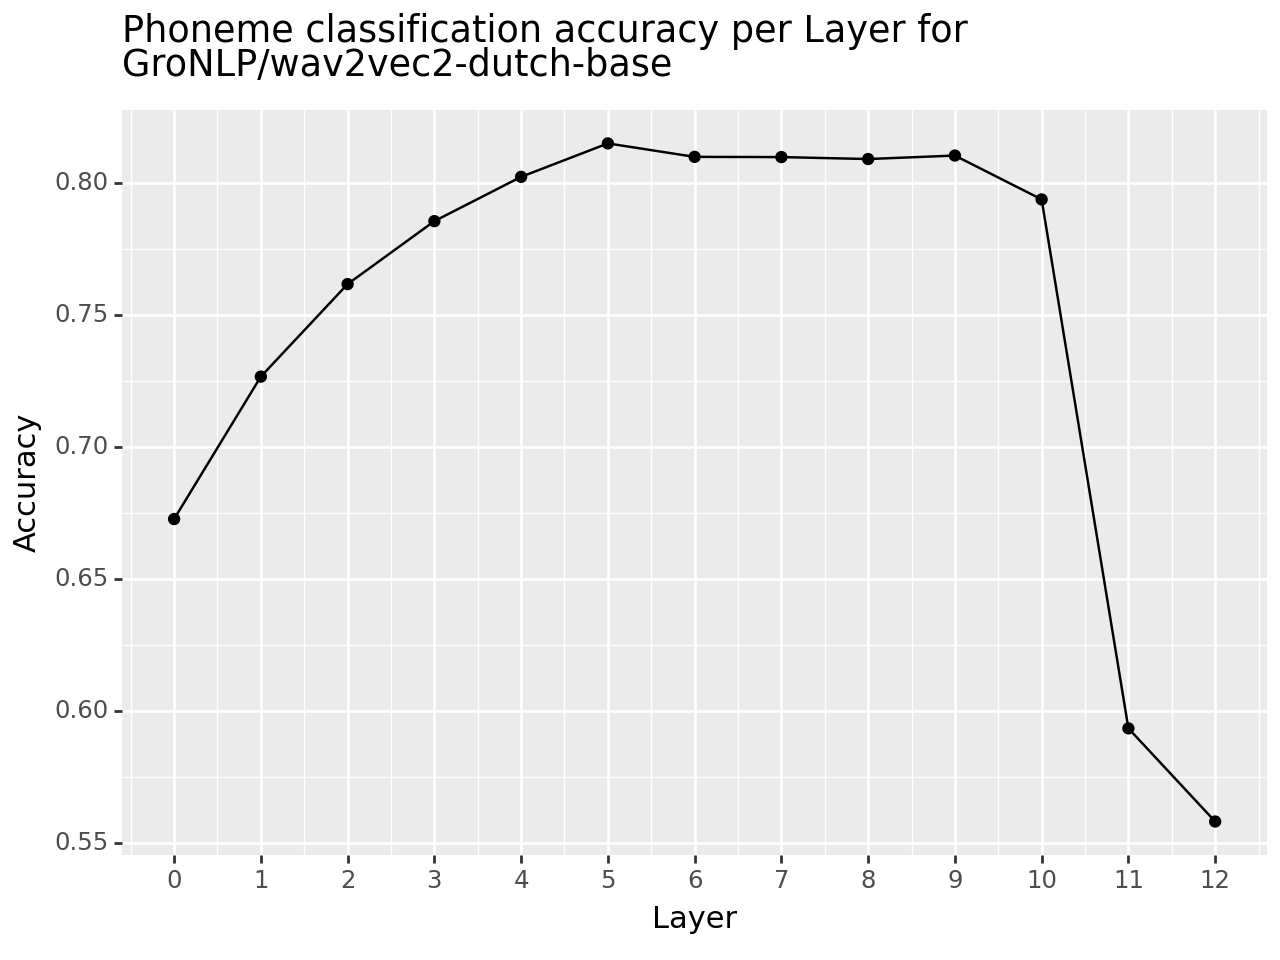

<Figure Size: (640 x 480)>

In [6]:
# Name of the model
model_name = "GroNLP/wav2vec2-dutch-base"

# Generate the phoneme representations
timit_test_phoneme_representations = saving_phoneme_representations(model_name = model_name,
                                                                    overwrite = False,
                                                                    split = 'test',
                                                                    save_dir = '/content/drive/MyDrive/Colab Notebooks/NLP/')

# Format the phoneme representations into classifier input
timit_test_classifier_input = generating_classifier_input(timit_test_phoneme_representations, overwrite = False)

# Run classification
results = classification(timit_test_classifier_input)

# Plot the results
plotting_results(results, model_name)


In [7]:
for item in results:
  print(item)

{'layer': 0, 'acc_score': 0.6727811137616189, 'f1_score': 0.6651856070227266}
{'layer': 1, 'acc_score': 0.7267417948507033, 'f1_score': 0.7207589085183522}
{'layer': 2, 'acc_score': 0.7617833347042856, 'f1_score': 0.7563238057072038}
{'layer': 3, 'acc_score': 0.7856379040881797, 'f1_score': 0.7814487235912976}
{'layer': 4, 'acc_score': 0.802418359792712, 'f1_score': 0.7987647184986195}
{'layer': 5, 'acc_score': 0.8150859587069178, 'f1_score': 0.8120719074632177}
{'layer': 6, 'acc_score': 0.8099860162869129, 'f1_score': 0.8068520321065815}
{'layer': 7, 'acc_score': 0.8099037591511064, 'f1_score': 0.806983362550922}
{'layer': 8, 'acc_score': 0.8091634449288476, 'f1_score': 0.8061727830782971}
{'layer': 9, 'acc_score': 0.8104795591017521, 'f1_score': 0.8071661928254757}
{'layer': 10, 'acc_score': 0.7938636176688327, 'f1_score': 0.7896139039746704}
{'layer': 11, 'acc_score': 0.5934852348441227, 'f1_score': 0.5670829923940298}
{'layer': 12, 'acc_score': 0.5581969235831208, 'f1_score': 0.527